In [3]:
from src.keyword_generator import KeywordGenerator
import os
import pathlib

from dotenv import load_dotenv, find_dotenv
from openai import OpenAI

import pandas as pd
import networkx as nx


First we include a toy example

In [ ]:
sun = ['sun', 'cloud', 'rain', 'hot']
cloud = ['cloud','grey','sad','sun','weather','sun']
rain = ['rain','water','cloud','cold','weather','snow']
hot = ['hot','sun','temperature','cold','warm','burn']

W = []
for w in sun:
    W.extend(eval(w))

W_unique = []

for x in W:
    if x not in W_unique:
        W_unique.append(x)

print(W)
print(W_unique)

In [ ]:
G = nx.Graph()

lists = [sun, cloud, rain, hot]
for lst in lists:
    for i, node1 in enumerate(lst):
        for node2 in lst[i + 1:]:
            if G.has_edge(node1, node2):
                G[node1][node2]['weight'] += 1
            else:
                G.add_edge(node1, node2, weight=1)

edge_widths = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, with_labels=True, width=edge_widths)

In [ ]:
personalization = {node: 0 for node in G.nodes()} 
personalization['sun'] = 1 
pagerank_scores = nx.pagerank(G, personalization=personalization)

scores = pagerank_scores
sorted_scores = sorted(scores.items(), key=lambda x:x[1], reverse = True)
sorted_scores

Now with gpt's outputs

In [26]:
kw_generator = KeywordGenerator(model='gpt-3.5-turbo')
keys = kw_generator.get_kwds('geoscience',3)

In [28]:
keys.split(', ')

['earth', 'research', 'environment']

In [30]:
keys = kw_generator.get_kwds('Living lab',40)
LL = keys.split(', ')
kwds = []
for w in LL:
    keys = kw_generator.get_kwds(w,100)
    kw_list = keys.split(', ')
    kwds.append(kw_list)


In [41]:
LL

['living lab',
 'research',
 'innovation',
 'user-centered',
 'co-creation',
 'collaboration',
 'technology',
 'testing',
 'real-world',
 'prototyping',
 'user experience',
 'community',
 'stakeholders',
 'design',
 'experimentation',
 'feedback',
 'implementation',
 'participatory',
 'interdisciplinary',
 'environment',
 'solutions',
 'development',
 'engagement',
 'methodology',
 'evaluation',
 'creativity',
 'digital',
 'urban',
 'process',
 'tools',
 'practices',
 'user involvement',
 'open innovation',
 'sustainability',
 'smart cities',
 'data collection',
 'workshops',
 'agile',
 'user needs',
 'case studies']

In [33]:
G_gpt = nx.Graph()

for lst in kwds:
    for i, node1 in enumerate(lst):
        for node2 in lst[i + 1:]:
            if G_gpt.has_edge(node1, node2):
                G_gpt[node1][node2]['weight'] += 1
            else:
                G_gpt.add_edge(node1, node2, weight=1)

In [48]:
list(G_gpt.nodes()) == 'living lab'

False

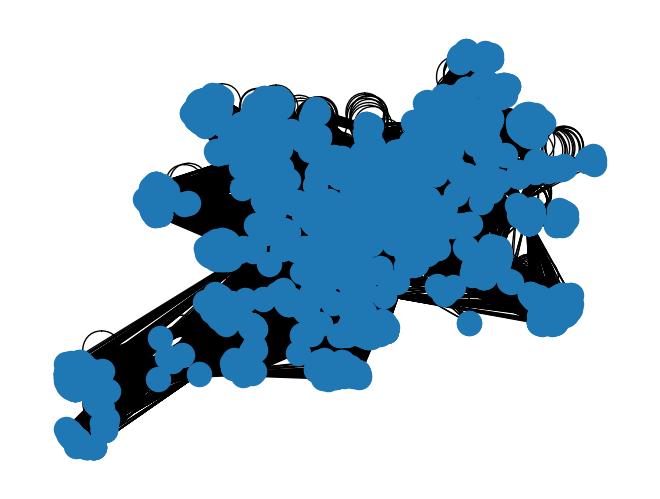

In [57]:
edge_widths = [0.1*G_gpt[u][v]['weight'] for u, v in G_gpt.edges()]
#nx.draw(G_gpt, with_labels=False, width=edge_widths)
nx.draw(G_gpt)

In [44]:
personalization = {node: 0 for node in G_gpt.nodes()} 
personalization['living lab'] = 1 
pagerank_scores = nx.pagerank(G_gpt, personalization=personalization)

scores = pagerank_scores
sorted_scores = sorted(scores.items(), key=lambda x:x[1], reverse = True)
sorted_scores

ZeroDivisionError: 

In [ ]:
kwds_extended = kwds + LL

In [50]:
G_gpt2 = nx.Graph()

for lst in kwds_extended:
    for i, node1 in enumerate(lst):
        for node2 in lst[i + 1:]:
            if G_gpt2.has_edge(node1, node2):
                G_gpt2[node1][node2]['weight'] += 1
            else:
                G_gpt2.add_edge(node1, node2, weight=1)

In [56]:
[print('ok') for v in G_gpt2.nodes() if v=='living lab']

[]

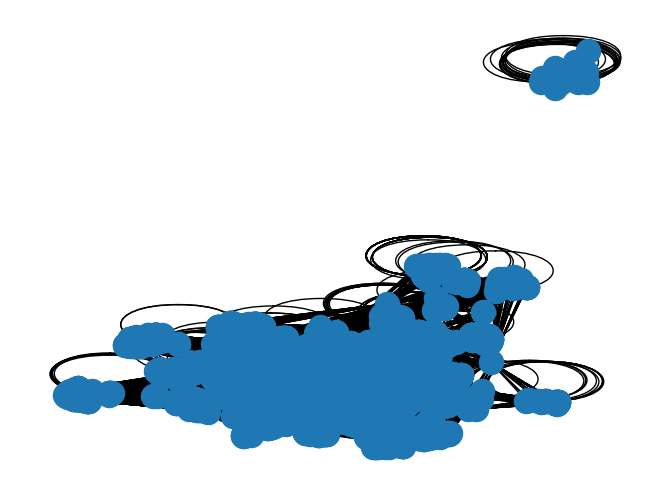

In [58]:
edge_widths2 = [0.001*G_gpt2[u][v]['weight'] for u, v in G_gpt2.edges()]
#nx.draw(G_gpt2, with_labels=False, width=edge_widths2)
nx.draw(G_gpt2)

In [53]:
personalization2 = {node: 0 for node in G_gpt2.nodes()} 
personalization2['living lab'] = 1 
pagerank_scores2 = nx.pagerank(G_gpt2, personalization=personalization2)

scores2 = pagerank_scores2
sorted_scores2 = sorted(scores2.items(), key=lambda x:x[1], reverse = True)
sorted_scores2

ZeroDivisionError: 

In [60]:
import pickle
with open("kwds/kwds", "wb") as fp:
    pickle.dump(kwds, fp)
#with open("kwds/kwds", "rb") as fp: 
#    kwds = pickle.load(fp)
with open("kwds/kwds_extended", "wb") as fp:
    pickle.dump(kwds_extended, fp)
#with open("kwds/kwds_extended", "rb") as fp: 
#    kwds_extended = pickle.load(fp)
with open("kwds/LL", "wb") as fp:
    pickle.dump(LL, fp)
#with open("kwds/LL", "rb") as fp: 
#    LL = pickle.load(fp)